In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:


# Import Libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from zipfile import ZipFile
import matplotlib.pyplot as plt



In [ ]:
dataset_path = '/content/drive/MyDrive/archive.zip'


In [ ]:
# Step 2: Extract Dataset
data_path = 'archive.zip'  # change name if different
with ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall()
    print('The dataset has been extracted.')

The dataset has been extracted.


In [ ]:
# Step 3: Set Parameters
IMG_SIZE = 224
BATCH_SIZE = 32
DATASET_PATH = '/content/archive'  # assuming inside archive

In [ ]:
import os
os.listdir('/content')

['.config',
 '.ipynb_checkpoints',
 'archive.zip',
 'drive',
 'Dataset',
 'sample_data']

In [ ]:
# Set image size and paths
IMG_SIZE = 224
BATCH_SIZE = 32
DATASET_PATH = '/content/Dataset'

In [ ]:
# Now create datagen
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
print(train_generator.class_indices)


{'Bus': 0, 'Car': 1, 'Truck': 2, 'motorcycle': 3}


In [ ]:
# Step 5: Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),


    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 6: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 7: Show Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Import optimizer
from tensorflow.keras.optimizers import Adam

# Create a new optimizer instance
optimizer = Adam()

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Step 8: Early Stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Step 9: Train the Model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.2217 - loss: 1.3991 - val_accuracy: 0.2500 - val_loss: 1.3784
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.3398 - loss: 1.3687 - val_accuracy: 0.3500 - val_loss: 1.3406
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3188 - loss: 1.3608 - val_accuracy: 0.4625 - val_loss: 1.2877
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4666 - loss: 1.2899 - val_accuracy: 0.4875 - val_loss: 1.1780
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4784 - loss: 1.2290 - val_accuracy: 0.5625 - val_loss: 1.1039
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5352 - loss: 1.0636 - val_accuracy: 0.5625 - val_loss: 1.0544
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5555 - loss: 1.1116 - val_accuracy: 0.5625 - val_loss: 0.9459
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5678 - loss: 1.0650 - val_accuracy: 0.5875 - val_loss:

In [ ]:
# Step 10: Save the Model
model.save('vehicle_model.h5')
print("Model saved as 'vehicle_model.h5'")

Model saved as 'vehicle_model.h5'


In [ ]:
# Step 11: Download the Model (optional)
from google.colab import files
files.download('vehicle_model.h5')

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model



In [ ]:

# Load the trained model
model = load_model('vehicle_model.h5')

In [ ]:

# Set the image size (should match training size)
IMG_SIZE = 224

In [ ]:

# Define your classes (make sure same order as during training)
classes = ['Bus', 'Car', 'Truck', 'motorcycle']  # Replace based on your folder names

In [ ]:
test_image_path = '/content/bikeimage for project.jpg'  # <- change to your uploaded image name

In [ ]:
# Preprocess the image
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img = img / 255.0  # normalization
img = np.expand_dims(img, axis=0)  # expand to batch dimension

In [ ]:
prediction = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


In [ ]:
predicted_class = classes[np.argmax(prediction)]
print("Predicted Vehicle Type:", predicted_class)

Predicted Vehicle Type: motorcycle


In [ ]:
# Step 1: Define Parking Slot Capacities and Current Vehicles
slot_capacity = {
    'Bike': 5,
    'Car': 10,
    'Truck': 2,
    'Bus': 3
}

current_vehicles = {
    'Bike': 3,
    'Car': 7,
    'Truck': 2,
    'Bus': 1
}

# Step 2: Check Slot Availability
vehicle_type = predicted_class  # from your prediction

# Map 'motorcycle' to 'Bike'
if vehicle_type == 'motorcycle':
    vehicle_type = 'Bike'

if vehicle_type in current_vehicles:  # Ensure the vehicle type is valid
    if current_vehicles[vehicle_type] < slot_capacity[vehicle_type]:
        print(f"✅ Parking Available for {vehicle_type}")
        print("🚦 Barrier Opens!")
        remaining_slots = slot_capacity[vehicle_type] - current_vehicles[vehicle_type]
        print(f"🅿️ Remaining slots for {vehicle_type}: {remaining_slots}")
        current_vehicles[vehicle_type] += 1  # update counter after allowing entry
    else:
        print(f"❌ No Parking Available for {vehicle_type}")
        print("🚫 Barrier Stays Closed!")

✅ Parking Available for Bike
🚦 Barrier Opens!
🅿️ Remaining slots for Bike: 2


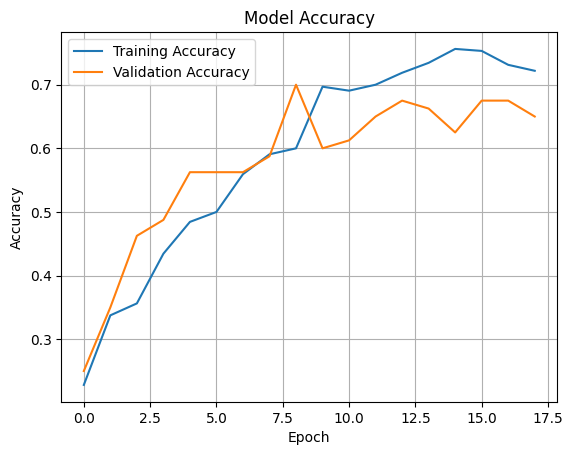

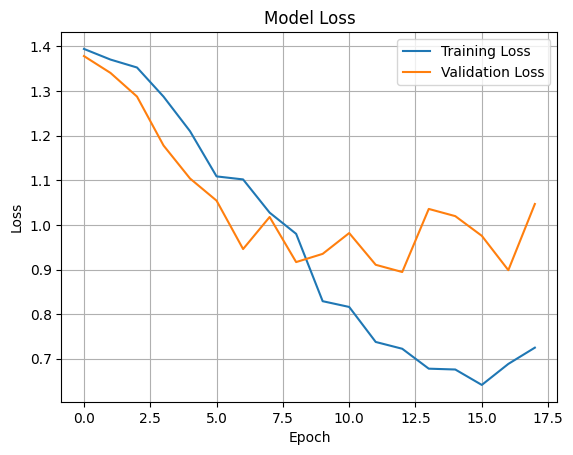

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

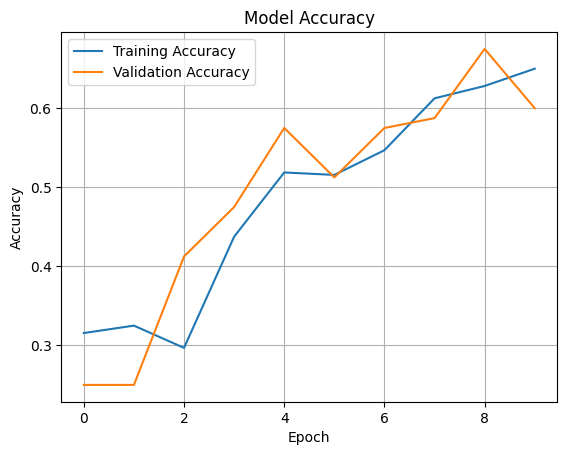

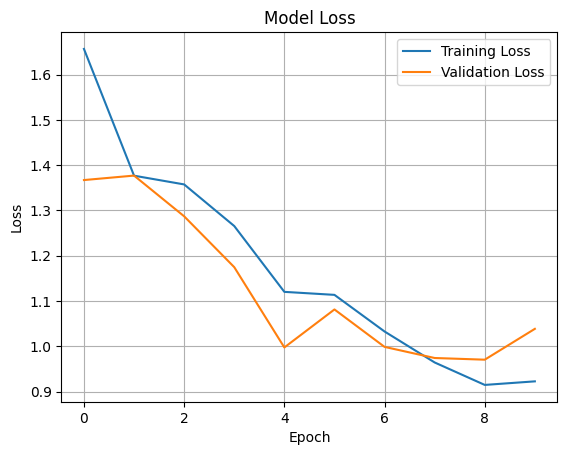

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 669ms/step


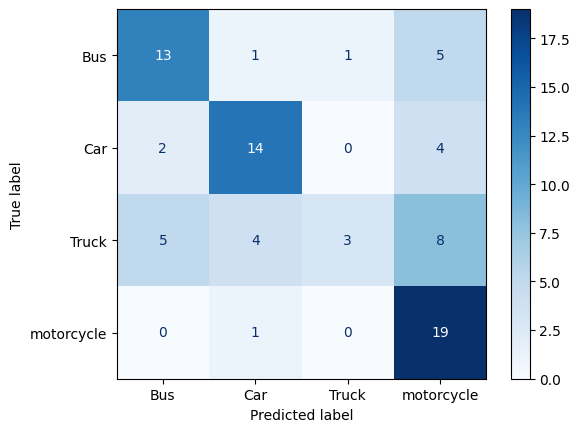

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get true labels and predictions
val_preds = model.predict(val_generator)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices.keys())

# Plot confusion matrix
disp.plot(cmap='Blues')
plt.grid(False)
plt.show()